In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Consistent plot size
from pylab import rcParams
rcParams['figure.figsize'] = (16,8)

# handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# time series related imports
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima


In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + TRIPADVISORS INDEX + VISITOR ATTENTION INDEX - DATA COMPOSITION 1 (70-15-15).csv', index_col="Monthly", parse_dates=True)
df.head()

,Tourist Arrival,Number of Posts,Number of Comments,Airbnb Vietnam,Vietnam restaurant,Shopping in Hanoi,Shopping in Ho Chi Minh,Vietnam tour,Skyscanner,Vietnam visa,...,Hoi An,Vietnam weather,Visa for Vietnam,Sgn airport,Phu Quoc,Vietnam itinerary,Vietnam trip,Things to do in Hue,Vietnam backpackers,Class
Monthly,,,,,,,,,,,,,,,,,,,,,
2008-01-01,399556,403,3049,11,59,32,8,58,7,69,...,27,58,29,18,20,0,32,0,8,Train
2008-01-02,411032,357,3211,0,51,0,0,46,6,61,...,27,58,31,10,19,5,39,7,5,Train
2008-01-03,414332,344,3153,0,57,7,24,58,6,61,...,27,50,29,38,28,6,30,0,0,Train
2008-01-04,395900,338,3184,0,51,6,9,58,6,66,...,27,41,30,25,22,8,45,0,8,Train
2008-01-05,366387,369,2964,0,57,0,7,57,6,63,...,27,44,24,16,22,5,47,0,9,Train


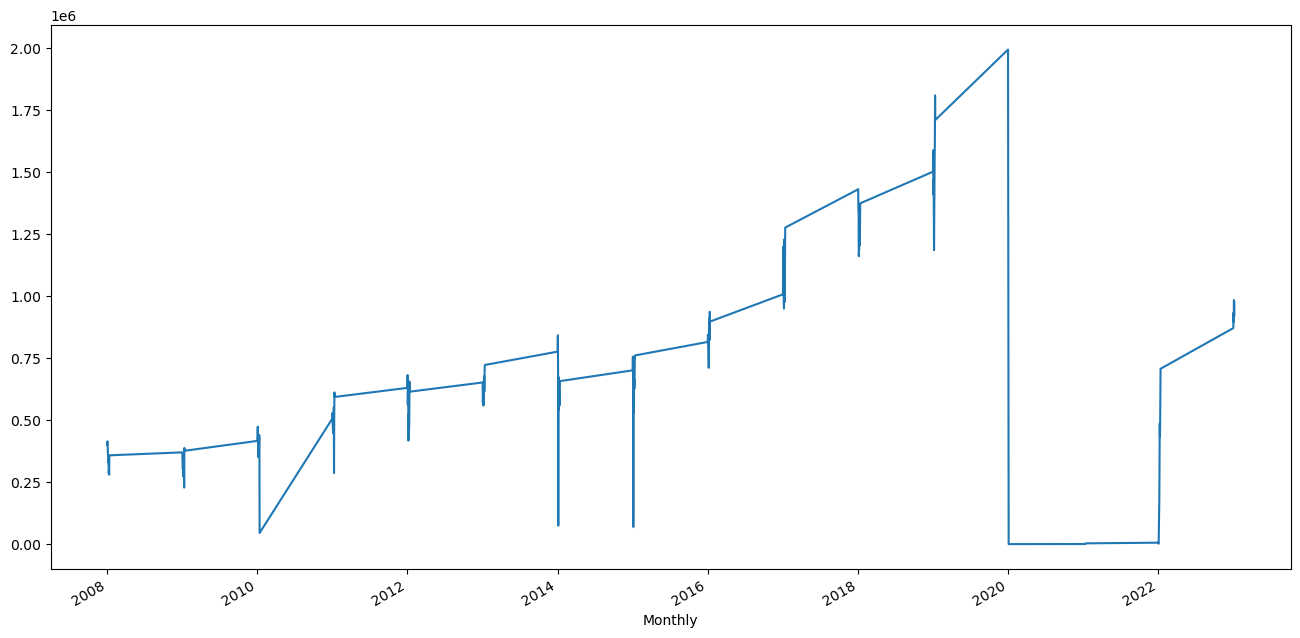

In [3]:
fig, ax = plt.subplots(figsize=(16,8))
ax = df['Tourist Arrival'].plot()
color_arr = ['g', 'r', 'm', 'b', 'y', 'k']
c_indx = 0
for x in df[df['Tourist Arrival']==1].index:
    ax.axvline(x=x, color=color_arr[c_indx], linewidth=0.5)
    if color_arr[c_indx] == 'k':
        c_indx = 0
    else:
        c_indx +=1

In [4]:
df1=df.drop(["Class"], axis=1)
print(df1)

            Tourist Arrival  Number of Posts  Number of Comments  \
Monthly                                                            
2008-01-01           399556              403                3049   
2008-01-02           411032              357                3211   
2008-01-03           414332              344                3153   
2008-01-04           395900              338                3184   
2008-01-05           366387              369                2964   
...                     ...              ...                 ...   
2023-01-02           932969              481                3576   
2023-01-03           895425              543                4058   
2023-01-04           984146              422                3135   
2023-01-05           916257              347                2609   
2023-01-06           975010              328                2339   

            Airbnb Vietnam  Vietnam restaurant  Shopping in Hanoi  \
Monthly                                       

In [5]:
auto_arima(df1['Tourist Arrival'], m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4947.042, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4937.754, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4938.437, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4945.121, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4948.808, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=4939.754, Time=0.13 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=4939.754, Time=0.11 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=4938.184, Time=0.05 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=4940.975, Time=0.24 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=4935.707, Time=0.04 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=4937.707, Time=0.10 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=4937.707, Time=0.10 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=4936.131, Time=0.04 sec
 ARIMA(0,1,0)(2,0,1)[12]

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [6]:
train = df1['Tourist Arrival'][:'01/02/2019'].dropna()
test = df1['Tourist Arrival']['01/03/2019':].dropna()
exog_train = df1.drop(['Tourist Arrival'], axis=1)[:'01/02/2019'].dropna()
exog_test = df1.drop(['Tourist Arrival'], axis=1)['01/03/2019':].dropna()

In [7]:
import statsmodels.api as sm
model = SARIMAX(train,order=(0,1,0),seasonal_order=(1,0,0,12),exog = exog_train,
                                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
results.summary()


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           23     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18479D+01    |proj g|=  3.15815D-05

At iterate    5    f=  1.18479D+01    |proj g|=  9.54449D-04

At iterate   10    f=  1.18466D+01    |proj g|=  1.47847D-02

At iterate   15    f=  1.18435D+01    |proj g|=  1.36845D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   23     17     25      1     0     0   2.507D-05   1.184D+01
  F =   11.843523097227299     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    Tourist Arrival   No. Observations:                  134
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood               -1587.032
Date:                            Wed, 23 Aug 2023   AIC                           3220.064
Time:                                    21:26:22   BIC                           3284.367
Sample:                                         0   HQIC                          3246.180
                                            - 134                                         
Covariance Type:                              opg                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Number of Posts           168.4862    456.195      0.369      0.712    -725.640    1062.612
Number of Comments         15.7908     47.694      0.331      0.741     -77.688     109.270
Airbnb Vietnam           -213.8774   2911.312     -0.073      0.941   -5919.944    5492.189
Vietnam restaurant       3823.9532   3193.219      1.198      0.231   -2434.642    1.01e+04
Shopping in Hanoi          23.4107   3190.568      0.007      0.994   -6229.987    6276.809
Shopping in Ho Chi Minh   598.1067   3467.197      0.173      0.863   -6197.474    7393.688
 Vietnam tour             465.5492   4581.643      0.102      0.919   -8514.306    9445.404
 Skyscanner              3412.0776   7697.268      0.443      0.658   -1.17e+04    1.85e+04
 Vietnam visa            1802.7638   4193.027      0.430      0.667   -6415.419       1e+04
 Vietnam airport          992.5615   4028.414      0.246      0.805   -6902.985    8888.108
 Vietnam flights         -889.7378   4471.713     -0.199      0.842   -9654.134    7874.658
 Danang airport           266.7380   2701.580      0.099      0.921   -5028.262    5561.738
 Hoi An                 -2974.9513   2271.300     -1.310      0.190   -7426.618    1476.716
 Vietnam weather         -282.3766   2656.760     -0.106      0.915   -5489.531    4924.777
 Visa for Vietnam         954.4735   4574.416      0.209      0.835   -8011.218    9920.165
 Sgn airport              524.9439   2671.228      0.197      0.844   -4710.568    5760.455
 Phu Quoc                3096.6750   2170.035      1.427      0.154   -1156.515    7349.865
 Vietnam itinerary      -3350.9559   2994.434     -1.119      0.263   -9219.938    2518.026
 Vietnam trip            3225.6711   2365.248      1.364      0.173   -1410.130    7861.473
 Things to do in Hue     3834.4939   3704.300      1.035      0.301   -3425.801    1.11e+04
 Vietnam backpackers    -6122.3731   3131.822     -1.955      0.051   -1.23e+04      15.886
ar.S.L12                    0.4083      0.083      4.939      0.000       0.246       0.570
sigma2                   1.459e+10      0.005   2.69e+12      0.000    1.46e+10    1.46e+10
===================================================================================
Ljung-Box (L1) (Q):                  14.81   Jarque-Bera (JB):               179.09
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.24
Prob(H) (two-sided):                  0.41   Kurtosis:                         8.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.65e+28. Standard errors may be unstable.
"""

In [8]:
start = len(train)
end = len(train) + len(test) - 1
y_pred = results.predict(start=start,end=end, exog = exog_test, dynamic=False).rename('SARIMA(0,1,0)(1,0,[0],12) Predictions')

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [9]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [10]:
RMSE = np.sqrt(mean_squared_error(test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 980310.4673799108


In [11]:
MAE = mean_absolute_error(test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 884642.3748277549


In [12]:
MAPE = mean_absolute_percentage_error(test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 1.7812999728821429e+21


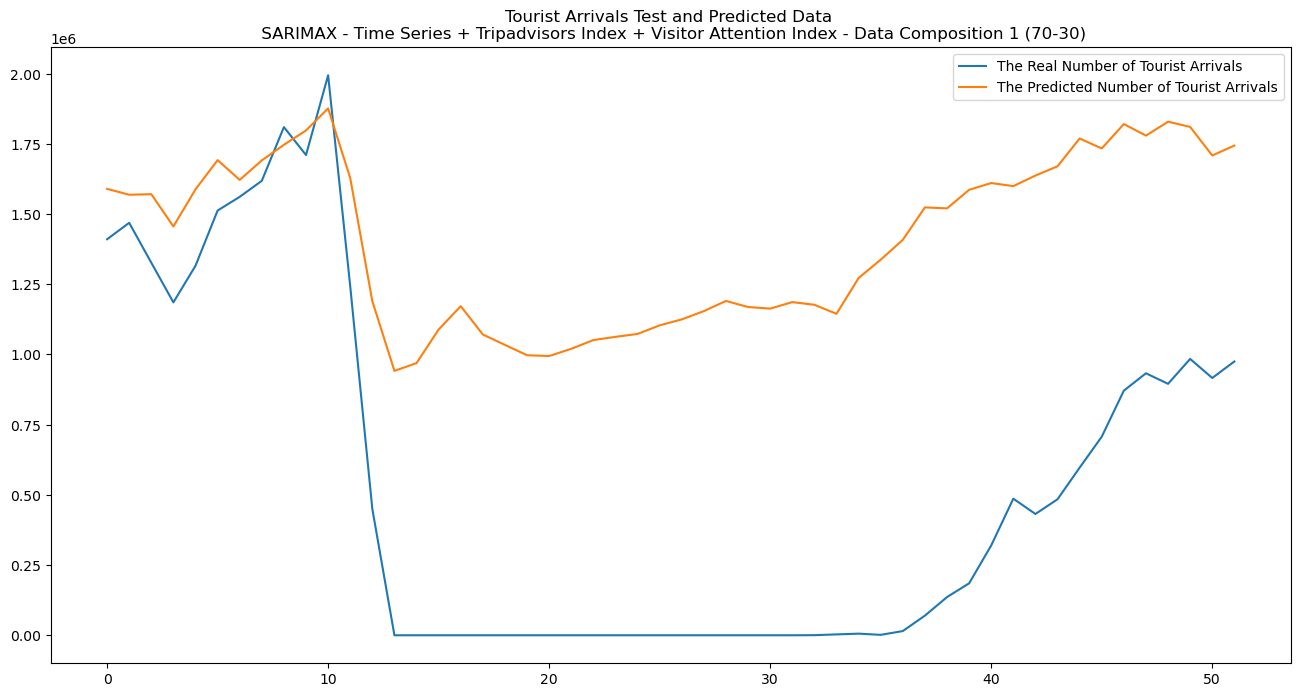

In [13]:
x_ax = range(len(test))
plt.plot(x_ax, test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n SARIMAX - Time Series + Tripadvisors Index + Visitor Attention Index - Data Composition 1 (70-30)")
plt.legend()
plt.show()